In [144]:
import pandas as pd
import os

# Define the path to the "data" folder
data_folder = '../data/'

# List of dataset filenames
files = ['benin-malanville.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']

# Initialize an empty dictionary to store the DataFrames
data_frames = {}

# Loop through the files and read each into a DataFrame
for file in files:
    file_path = os.path.join(data_folder, file)
    if os.path.exists(file_path):
        # Read the CSV file into a DataFrame
        data_frames[file] = pd.read_csv(file_path)
        print(f"Loaded {file} successfully.")
    else:
        print(f"File {file} not found in the {data_folder} directory.")

# Example: Accessing the DataFrame for Benin Malanville dataset
benin_df = data_frames.get('benin-malanville.csv')

# Display the first few rows of the Benin dataset
if benin_df is not None:
    print(benin_df.head())


Loaded benin-malanville.csv successfully.
Loaded sierraleone-bumbuna.csv successfully.
Loaded togo-dapaong_qc.csv successfully.
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0          

### Step 1: Data Preprocessing Pipeline

In [145]:
def dataset_info(df, name="Dataset"):
    print(f"🔍 {name} Information\n")
    print(f"Shape: {df.shape}")
    print("\nColumns and Data Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe(include='all'))


In [ ]:
import pandas as pd

# Example: Load your datasets
benin = pd.read_csv("../data/benin-malanville.csv")
sierra_leone = pd.read_csv("../data/sierraleone-bumbuna.csv")
togo = pd.read_csv("../data/togo-dapaong_qc.csv")

# Use the function for each dataset
dataset_info(benin, name="Benin Malanville")
dataset_info(sierra_leone, name="Sierra Leone Bumbuna")
dataset_info(togo, name="Togo Dapaong")


🔍 Benin Malanville Information

Shape: (525600, 19)

Columns and Data Types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB    

### Integrate the 3 country data

In [ ]:
import pandas as pd

# Load data for each country
benin_data = pd.read_csv("../data/benin-malanville.csv")
sierra_leone_data = pd.read_csv("../data/sierraleone-bumbuna.csv")
togo_data = pd.read_csv("../data/togo-dapaong_qc.csv")

# Add a 'Country' column to identify the source of each record
benin_data['Country'] = 'Benin'
sierra_leone_data['Country'] = 'Sierra Leone'
togo_data['Country'] = 'Togo'

# Combine all data into a single DataFrame
combined_data = pd.concat([benin_data, sierra_leone_data, togo_data], ignore_index=True)

# Save the integrated dataset to a new CSV file
combined_data.to_csv("integrated_data.csv", index=False)

print("Data integrated successfully! Shape of the combined data:", combined_data.shape)


In [ ]:
combined_data.head()

In [114]:
import pandas as pd

# Select the columns of interest
columns_of_interest = ['Cleaning', 'Precipitation']

# Compute summary statistics
summary_stats = combined_data[columns_of_interest].describe()

# Display the summary statistics
print("Summary Statistics for Cleaning and Precipitation:")
print(summary_stats)

Summary Statistics for Cleaning and Precipitation:
           Cleaning  Precipitation
count  1.576800e+06   1.576800e+06
mean   8.079655e-04   2.697615e-03
std    2.841326e-02   3.803610e-02
min    0.000000e+00   0.000000e+00
25%    0.000000e+00   0.000000e+00
50%    0.000000e+00   0.000000e+00
75%    0.000000e+00   0.000000e+00
max    1.000000e+00   2.500000e+00


In [115]:
# Frequency count of 'Country' column
country_frequency = combined_data['Country'].value_counts()

# Display the frequency
print(country_frequency)

Country
Benin           525600
Sierra Leone    525600
Togo            525600
Name: count, dtype: int64


In [116]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576800 entries, 0 to 1576799
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1576800 non-null  object 
 1   GHI            1576800 non-null  float64
 2   DNI            1576800 non-null  float64
 3   DHI            1576800 non-null  float64
 4   ModA           1576800 non-null  float64
 5   ModB           1576800 non-null  float64
 6   Tamb           1576800 non-null  float64
 7   RH             1576800 non-null  float64
 8   WS             1576800 non-null  float64
 9   WSgust         1576800 non-null  float64
 10  WSstdev        1576800 non-null  float64
 11  WD             1576800 non-null  float64
 12  WDstdev        1576800 non-null  float64
 13  BP             1576800 non-null  int64  
 14  Cleaning       1576800 non-null  int64  
 15  Precipitation  1576800 non-null  float64
 16  TModA          1576800 non-null  float64
 17  TModB   

### compute new variables

In [117]:
# Compute new variables
combined_data['AirDensity'] = combined_data['BP'] / (287.05 * (combined_data['Tamb'] + 273.15))  # kg/m³
combined_data['TotalIrradiance'] = combined_data['GHI'] + combined_data['DHI']
combined_data['WindEnergyPotential'] = combined_data['WS'] ** 3  # Proportional to power generation
combined_data['NormalizedGHI'] = combined_data['GHI'] / combined_data['GHI'].max()
combined_data['TempDifference'] = combined_data['TModA'] - combined_data['Tamb']

# Display the updated dataset head
combined_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,Precipitation,TModA,TModB,Comments,Country,AirDensity,TotalIrradiance,WindEnergyPotential,NormalizedGHI,TempDifference
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,0.0,26.3,26.2,NaN,Benin,0.011614,-2.3,0.000,-0.000801,0.1
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,0.0,26.3,26.2,NaN,Benin,0.011614,-2.2,0.000,-0.000734,0.1
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,0.0,26.4,26.2,NaN,Benin,0.011603,-2.2,0.027,-0.000734,0.2
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,0.0,26.4,26.3,NaN,Benin,0.011603,-2.1,0.008,-0.000734,0.2
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,0.0,26.4,26.3,NaN,Benin,0.011603,-2.0,0.001,-0.000667,0.2


### 1.2 Data Type Correction

In [118]:
# Convert 'Timestamp' to datetime format
combined_data['Timestamp'] = pd.to_datetime(combined_data['Timestamp'], errors='coerce')

# # Ensure 'BP' and 'Cleaning' are integers
# combined_data['BP'] = combined_data['BP'].astype('int64')
# combined_data['Cleaning'] = combined_data['Cleaning'].astype('int64')

# Convert 'Country' column to category for memory optimization
combined_data['Country'] = combined_data['Country'].astype('category')
combined_data['Cleaning'] = combined_data['Cleaning'].astype('object')

# Since 'Comments' column contains only NaN, it's likely safe to drop it
combined_data = combined_data.drop(columns=['Comments'])

# Check for any other type issues (e.g., non-numeric columns that should be numeric)
# This could be done by reviewing columns that are incorrectly typed
combined_data['GHI'] = pd.to_numeric(combined_data['GHI'], errors='coerce')
combined_data['DNI'] = pd.to_numeric(combined_data['DNI'], errors='coerce')
combined_data['DHI'] = pd.to_numeric(combined_data['DHI'], errors='coerce')
combined_data['ModA'] = pd.to_numeric(combined_data['ModA'], errors='coerce')
combined_data['ModB'] = pd.to_numeric(combined_data['ModB'], errors='coerce')
combined_data['Tamb'] = pd.to_numeric(combined_data['Tamb'], errors='coerce')
combined_data['RH'] = pd.to_numeric(combined_data['RH'], errors='coerce')
combined_data['WS'] = pd.to_numeric(combined_data['WS'], errors='coerce')
combined_data['WSgust'] = pd.to_numeric(combined_data['WSgust'], errors='coerce')
combined_data['WSstdev'] = pd.to_numeric(combined_data['WSstdev'], errors='coerce')
combined_data['WD'] = pd.to_numeric(combined_data['WD'], errors='coerce')
combined_data['WDstdev'] = pd.to_numeric(combined_data['WDstdev'], errors='coerce')
# combined_data['Precipitation'] = pd.to_numeric(combined_data['Precipitation'], errors='coerce')
combined_data['TModA'] = pd.to_numeric(combined_data['TModA'], errors='coerce')
combined_data['TModB'] = pd.to_numeric(combined_data['TModB'], errors='coerce')

# Check the final data types
combined_data.dtypes

Timestamp              datetime64[ns]
GHI                           float64
DNI                           float64
DHI                           float64
ModA                          float64
ModB                          float64
Tamb                          float64
RH                            float64
WS                            float64
WSgust                        float64
WSstdev                       float64
WD                            float64
WDstdev                       float64
BP                              int64
Cleaning                       object
Precipitation                 float64
TModA                         float64
TModB                         float64
Country                      category
AirDensity                    float64
TotalIrradiance               float64
WindEnergyPotential           float64
NormalizedGHI                 float64
TempDifference                float64
dtype: object

### 1.1 Handling Missing Data

In [119]:
# Check for missing values before treatment
print("Missing values before treatment:")
print(combined_data.isnull().sum())


Missing values before treatment:
Timestamp              0
GHI                    0
DNI                    0
DHI                    0
ModA                   0
ModB                   0
Tamb                   0
RH                     0
WS                     0
WSgust                 0
WSstdev                0
WD                     0
WDstdev                0
BP                     0
Cleaning               0
Precipitation          0
TModA                  0
TModB                  0
Country                0
AirDensity             0
TotalIrradiance        0
WindEnergyPotential    0
NormalizedGHI          0
TempDifference         0
dtype: int64


### 1.3 Encoding Categorical Variables (One-Hot Encoding)

In [120]:
# Use pandas get_dummies to perform one-hot encoding
data_encoded = pd.get_dummies(combined_data, columns=['Country', 'Cleaning'], drop_first=False)

# Check the resulting DataFrame
data_encoded.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,AirDensity,TotalIrradiance,WindEnergyPotential,NormalizedGHI,TempDifference,Country_Benin,Country_Sierra Leone,Country_Togo,Cleaning_0,Cleaning_1
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,0.011614,-2.3,0.000,-0.000801,0.1,True,False,False,True,False
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,0.011614,-2.2,0.000,-0.000734,0.1,True,False,False,True,False
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,0.011603,-2.2,0.027,-0.000734,0.2,True,False,False,True,False
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,0.011603,-2.1,0.008,-0.000734,0.2,True,False,False,True,False
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,0.011603,-2.0,0.001,-0.000667,0.2,True,False,False,True,False


### 1.4 Outlier Detection & Handling

In [74]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # List of continuous variables for which you want to detect outliers
# continuous_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'Precipitation', 'TModA', 'TModB', 'AirDensity', 'TotalIrradiance', 'WindEnergyPotential', 'NormalizedGHI', 'TempDifference']

# # Initialize the figure for 2 rows and len(continuous_columns) columns (one per variable)
# fig, axes = plt.subplots(nrows=2, ncols=len(continuous_columns), figsize=(60, 10))

# # Loop through each continuous column and create box plots before and after outlier treatment
# for i, col in enumerate(continuous_columns):
#     # Before handling outliers
#     sns.boxplot(combined_data[col], ax=axes[0, i])
#     axes[0, i].set_title(f'Before: {col}')

#     # Handle outliers using IQR
#     Q1 = combined_data[col].quantile(0.25)
#     Q3 = combined_data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Filter out rows where the value is outside the IQR range
#     data_cleaned = combined_data[(combined_data[col] >= lower_bound) & (combined_data[col] <= upper_bound)]

#     # After handling outliers
#     sns.boxplot(data_cleaned[col], ax=axes[1, i])
#     axes[1, i].set_title(f'After: {col}')

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()


ValueError: cannot reindex on an axis with duplicate labels

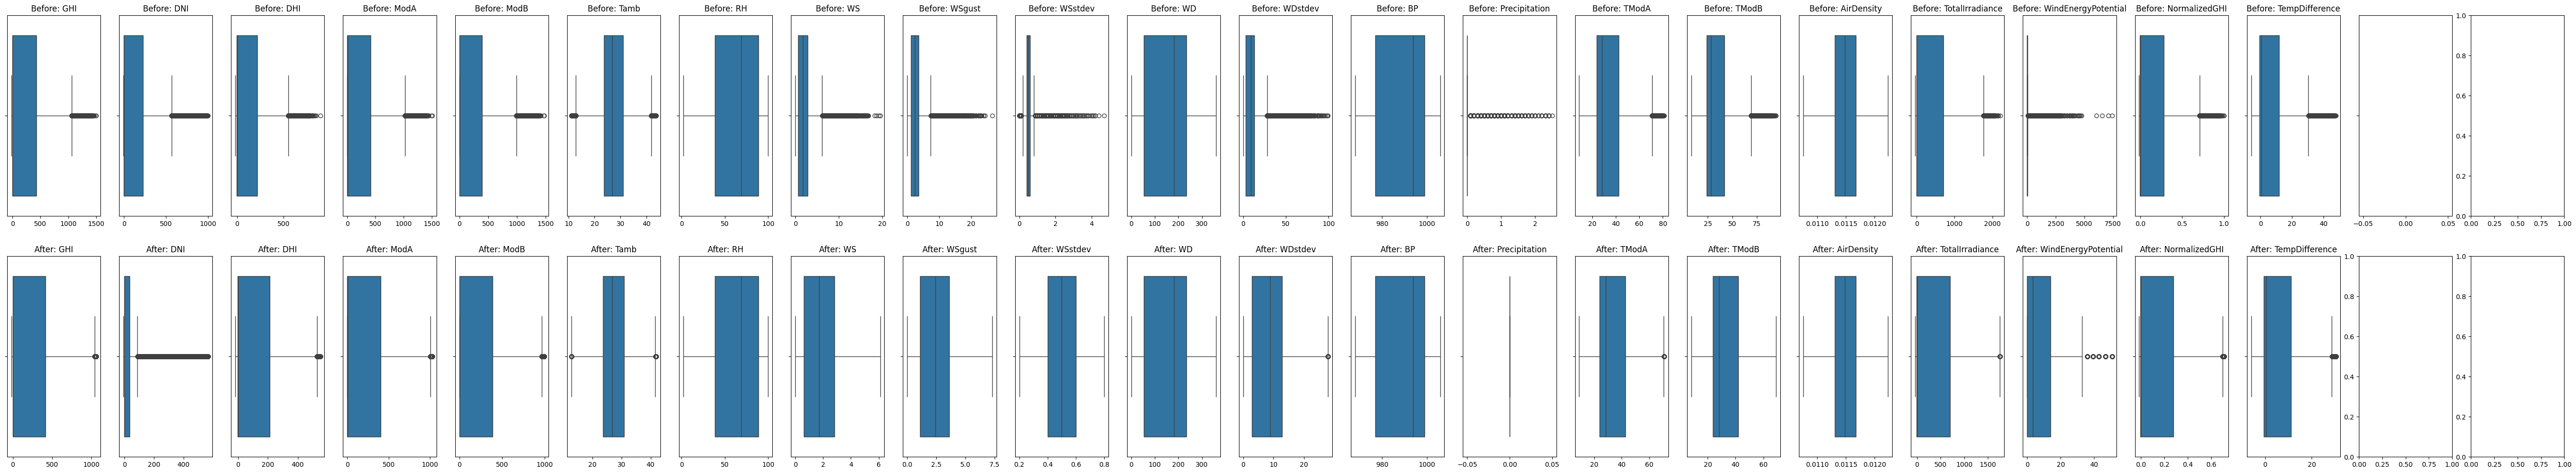

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically select continuous columns (numerical columns excluding categorical ones)
continuous_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of columns and adjust the figure size accordingly
n_cols = len(continuous_columns)
fig_width = max(15, n_cols * 3)  # Dynamic width based on the number of columns

# Create a figure with a horizontal scrollable layout
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(fig_width, 12), squeeze=False)

# Loop through each continuous column and create box plots before and after outlier treatment
for i, col in enumerate(continuous_columns):
    # Before handling outliers
    sns.boxplot(data=combined_data, x=col, ax=axes[0, i])
    axes[0, i].set_title(f'Before: {col}')
    axes[0, i].set_xlabel('')
    
    # Handle outliers using IQR
    Q1 = combined_data[col].quantile(0.25)
    Q3 = combined_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows where the value is outside the IQR range
    data_cleaned = combined_data[(combined_data[col] >= lower_bound) & (combined_data[col] <= upper_bound)]

    # After handling outliers
    sns.boxplot(data=data_cleaned, x=col, ax=axes[1, i])
    axes[1, i].set_title(f'After: {col}')
    axes[1, i].set_xlabel('')

# Adjust layout to prevent overlap and set tight layout
plt.tight_layout()

# Display the plot
plt.show()


### Step 2: Exploratory Data Analysis (EDA)

In [121]:
import pandas as pd

# Dynamically select continuous columns (numerical columns excluding categorical ones)
continuous_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the statistical summary for continuous variables
statistical_summary = combined_data[continuous_columns].describe().T

# Adding additional statistical measures (if needed)
statistical_summary['skew'] = combined_data[continuous_columns].skew()
statistical_summary['kurtosis'] = combined_data[continuous_columns].kurtosis()

# Rename the columns for clarity
statistical_summary = statistical_summary.rename(columns={
    "count": "Count",
    "mean": "Mean",
    "std": "Standard Deviation",
    "min": "Minimum",
    "25%": "25th Percentile",
    "50%": "Median",
    "75%": "75th Percentile",
    "max": "Maximum",
    "skew": "Skewness",
    "kurtosis": "Kurtosis"
})

# Display the summary as a table
print("Statistical Summaries")
statistical_summary

Statistical Summaries


,Count,Mean,Standard Deviation,Minimum,25th Percentile,Median,75th Percentile,Maximum,Skewness,Kurtosis
GHI,1576800.0,224.357336,318.107274,-19.500000,-2.200000,1.200000,424.400000,1499.000000,1.144416,-0.101839
DNI,1576800.0,144.940774,245.378143,-7.800000,-0.200000,0.000000,227.000000,1004.500000,1.499176,0.829507
DHI,1576800.0,115.174628,158.060218,-17.900000,-1.400000,1.400000,219.000000,892.000000,1.181121,0.374662
ModA,1576800.0,223.125655,315.473164,0.000000,0.000000,4.100000,411.100000,1507.000000,1.173698,-0.053997
ModB,1576800.0,215.522285,304.943853,0.000000,0.000000,4.000000,397.300000,1473.000000,1.180689,-0.020364
Tamb,1576800.0,27.416955,5.131024,11.000000,23.700000,26.800000,31.000000,43.800000,0.268216,-0.295731
RH,1576800.0,62.983329,28.543656,2.100000,38.600000,69.000000,88.600000,100.000000,-0.424533,-1.126046
WS,1576800.0,1.878440,1.536357,0.000000,0.600000,1.800000,2.800000,19.500000,0.862375,1.352098
WSgust,1576800.0,2.576763,1.961275,0.000000,1.100000,2.400000,3.600000,26.600000,0.890639,1.768222
WSstdev,1576800.0,0.464984,0.290400,0.000000,0.400000,0.500000,0.600000,4.700000,0.503232,2.424888


### Heatmap Plot to Visualize Correlations

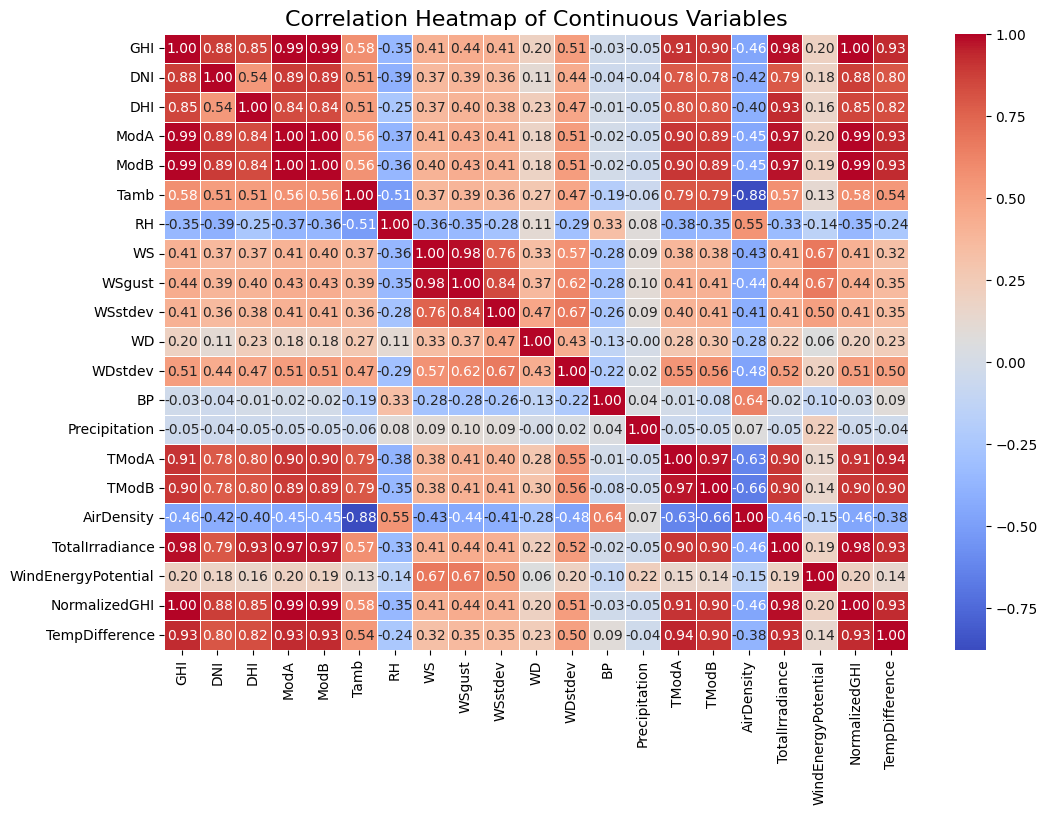

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix for continuous variables
continuous_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = combined_data[continuous_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation values in the heatmap
    fmt=".2f",   # Format for annotation
    cmap="coolwarm",  # Color palette
    linewidths=0.5,  # Line width between cells
    cbar=True,  # Show color bar
)

# Add title to the heatmap
plt.title('Correlation Heatmap of Continuous Variables', fontsize=16)

# Display the heatmap
plt.show()


In [123]:
import pandas as pd

# Compute the correlation matrix for continuous variables
continuous_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = combined_data[continuous_columns].corr()

# Convert the correlation matrix to a DataFrame for better formatting
correlation_table = pd.DataFrame(correlation_matrix)

# Display the table
print("Correlation Matrix (Table):")
print(correlation_table)


Correlation Matrix (Table):
                          GHI       DNI       DHI      ModA      ModB  \
GHI                  1.000000  0.876458  0.853896  0.994677  0.994937   
DNI                  0.876458  1.000000  0.535716  0.885429  0.885324   
DHI                  0.853896  0.535716  1.000000  0.836448  0.835537   
ModA                 0.994677  0.885429  0.836448  1.000000  0.999123   
ModB                 0.994937  0.885324  0.835537  0.999123  1.000000   
Tamb                 0.575558  0.512039  0.508922  0.564316  0.561581   
RH                  -0.354140 -0.394256 -0.252118 -0.371463 -0.362699   
WS                   0.410927  0.366983  0.368132  0.405006  0.403339   
WSgust               0.438685  0.387957  0.395187  0.432768  0.431077   
WSstdev              0.412762  0.356054  0.377715  0.407808  0.406692   
WD                   0.198249  0.112666  0.228444  0.175539  0.180028   
WDstdev              0.514563  0.441474  0.470179  0.509456  0.508812   
BP                  -0.

### Spatial Analysis

In [130]:
!pip install geopandas folium geopy

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 660.6 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 660.6 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/125.4 kB 573.4 kB/s eta 0:00:01
   ---------------------------------- --- 112.6/125.4 kB 731.4 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 602.4 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 602.4 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 602.4 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 602.4 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 602.4 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 254.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ------------------------------ --------- 30.7/40.3 kB ? 


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: C:\Users\getne\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Clustering

C:\Users\getne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


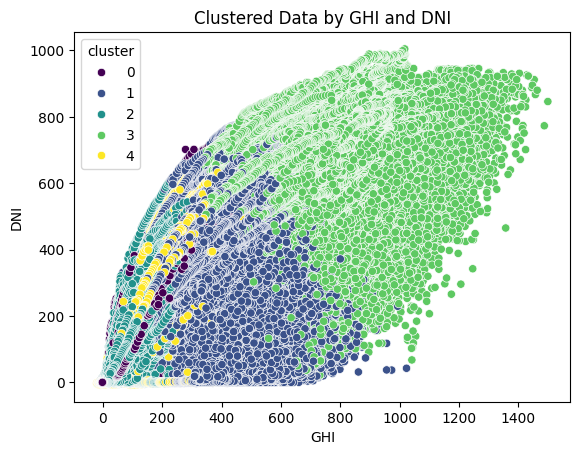

[[-0.63749863 -0.54360811 -0.61770413 -0.62756986 -0.62730056 -0.78291542
   0.72247091 -1.201809   -1.25152633 -1.45266249]
 [ 0.642954    0.24687075  1.19618377  0.60401965  0.60605278  0.58974559
  -0.14805894  0.14077936  0.16966651  0.23493491]
 [-0.65364024 -0.55020992 -0.63745947 -0.64895632 -0.64852282 -0.34026646
   0.06254742 -0.18893907 -0.20339258 -0.01928126]
 [ 1.80391201  1.81101326  1.19472057  1.82471449  1.82073667  1.04732325
  -0.83065207  0.85737827  0.89782533  0.79932647]
 [-0.42424653 -0.41792292 -0.27826566 -0.44062898 -0.43872932  0.09134068
   0.07555411  1.45203613  1.49224929  1.19826341]]


In [132]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering (e.g., GHI, DNI, etc.)
features = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev']
X = combined_data[features].dropna()  # Drop rows with missing values

# Normalize the data (optional but recommended for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust n_clusters based on your data
combined_data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (if you have reduced dimensions, e.g., with PCA)
sns.scatterplot(data=combined_data, x='GHI', y='DNI', hue='cluster', palette='viridis')
plt.title("Clustered Data by GHI and DNI")
plt.show()

# Inspect cluster centers
print(kmeans.cluster_centers_)


### Time-Series Analysis

#### Step 1: Preprocess the Time Series Data

In [134]:
import pandas as pd

# Ensure 'Timestamp' is in datetime format
combined_data['Timestamp'] = pd.to_datetime(combined_data['Timestamp'])

# Set 'Timestamp' as the index
combined_data.set_index('Timestamp', inplace=True)

# Check the first few rows
print(combined_data.head())


                     GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

                     WSstdev  ...  Precipitation  TModA  TModB Country  \
Timestamp                     ...                                        
2021-08-09 00:01:00      0.1  ...            0.0   26.3   26.2   Benin   
2021-08-09 00:02:00      0.0  ...            0.0   26.3   26.2   Benin   
2021-08-09 00:03:00      0.5  ...            0.0   26.4   26.2   Benin   
2021-08-09 00:04:00      0.4  ...            0.0   26.4   26.3   Benin   
2021-08-09 00:05:00      0.3  

#### Step 2: Extract Time Features:

In [135]:
# Extract additional time-based features for analysis
combined_data['year'] = combined_data.index.year
combined_data['month'] = combined_data.index.month
combined_data['day'] = combined_data.index.day
combined_data['hour'] = combined_data.index.hour
combined_data['weekday'] = combined_data.index.weekday  # Monday=0, Sunday=6

# Check the new columns
print(combined_data[['year', 'month', 'day', 'hour', 'weekday']].head())


                     year  month  day  hour  weekday
Timestamp                                           
2021-08-09 00:01:00  2021      8    9     0        0
2021-08-09 00:02:00  2021      8    9     0        0
2021-08-09 00:03:00  2021      8    9     0        0
2021-08-09 00:04:00  2021      8    9     0        0
2021-08-09 00:05:00  2021      8    9     0        0


#### Step 3: Aggregate the Data to Identify Trends

<Axes: title={'center': 'Monthly Average GHI'}, xlabel='year,month'>

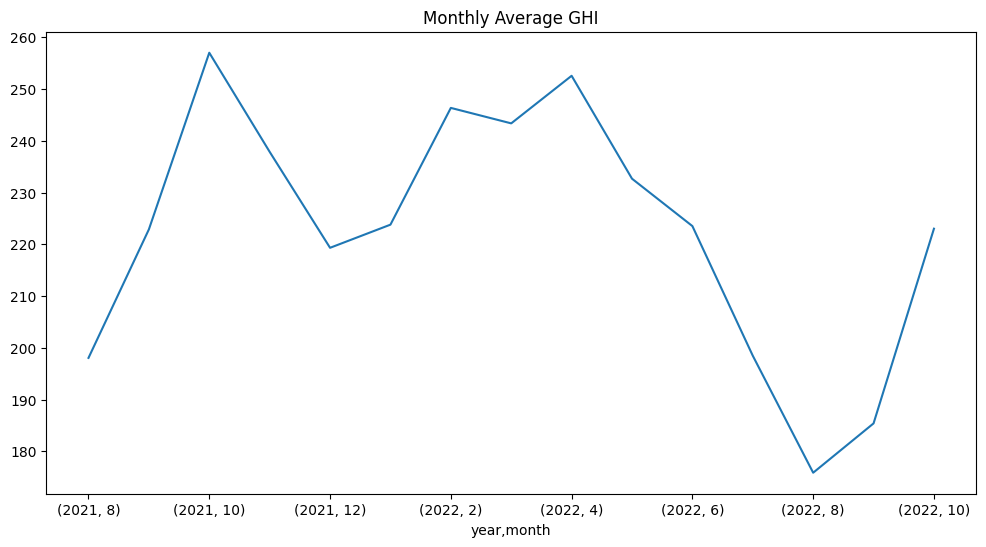

In [136]:
# Group by year and month to find the seasonal pattern
monthly_avg = combined_data.groupby(['year', 'month'])[['GHI', 'DNI', 'DHI']].mean()

# Plotting the monthly trend for GHI
monthly_avg['GHI'].plot(title="Monthly Average GHI", figsize=(12, 6))


<Axes: title={'center': 'Average GHI by Hour'}, xlabel='hour'>

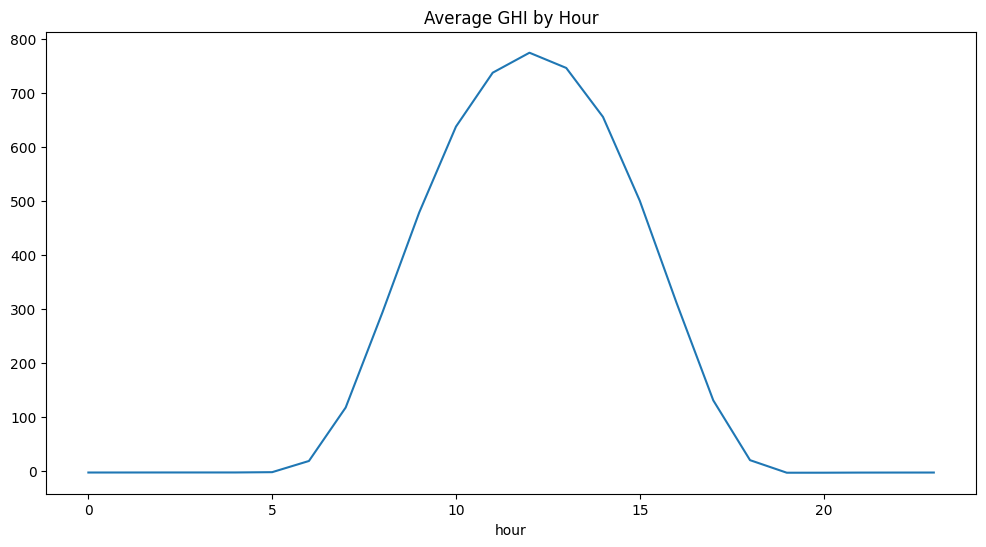

In [137]:
# Group by hour of the day to observe daily patterns
hourly_avg = combined_data.groupby('hour')[['GHI', 'DNI', 'DHI']].mean()

# Plotting the daily trend for GHI
hourly_avg['GHI'].plot(title="Average GHI by Hour", figsize=(12, 6))


#### Step 4: Seasonal Decomposition of Time Series (Trend, Seasonal, and Residual)

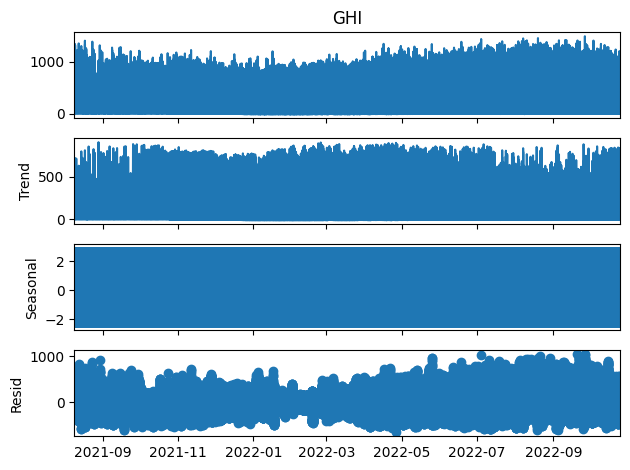

In [138]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Decompose the time series for GHI (Global Horizontal Irradiance)
decomposition = sm.tsa.seasonal_decompose(combined_data['GHI'], model='additive', period=365)  # period=365 for daily data

# Plot the decomposition
decomposition.plot()
plt.show()


#### 2. Examine Variability in Solar Potential Over Time

C:\Users\getne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


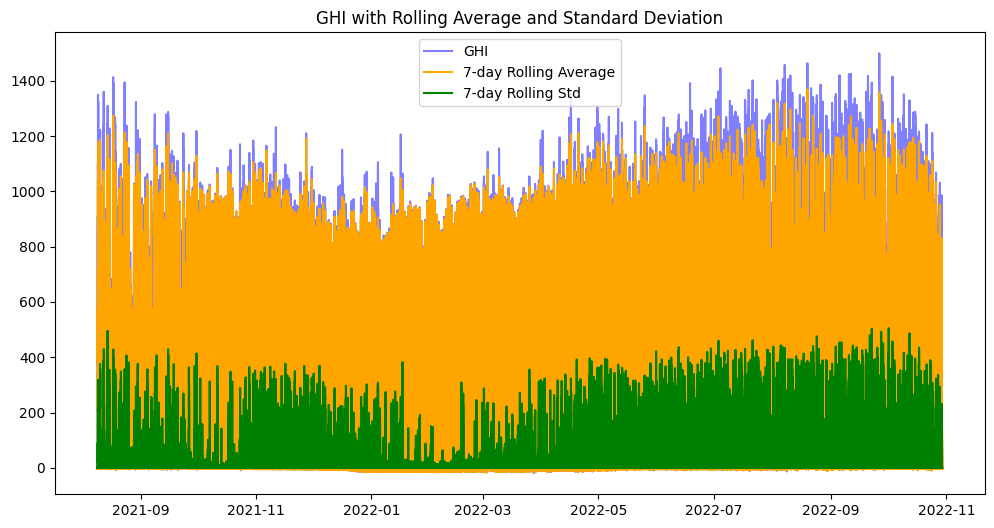

In [139]:
# Calculate 7-day rolling average for GHI to observe trends
combined_data['GHI_rolling_avg'] = combined_data['GHI'].rolling(window=7).mean()

# Calculate 7-day rolling standard deviation to observe variability
combined_data['GHI_rolling_std'] = combined_data['GHI'].rolling(window=7).std()

# Plot GHI, Rolling Average, and Rolling Std
plt.figure(figsize=(12, 6))
plt.plot(combined_data['GHI'], label='GHI', color='blue', alpha=0.5)
plt.plot(combined_data['GHI_rolling_avg'], label='7-day Rolling Average', color='orange')
plt.plot(combined_data['GHI_rolling_std'], label='7-day Rolling Std', color='green')
plt.title('GHI with Rolling Average and Standard Deviation')
plt.legend()
plt.show()


#### Step 6: Long-Term Variability (Annual Trends)

<Axes: title={'center': 'Yearly Average GHI'}, xlabel='year'>

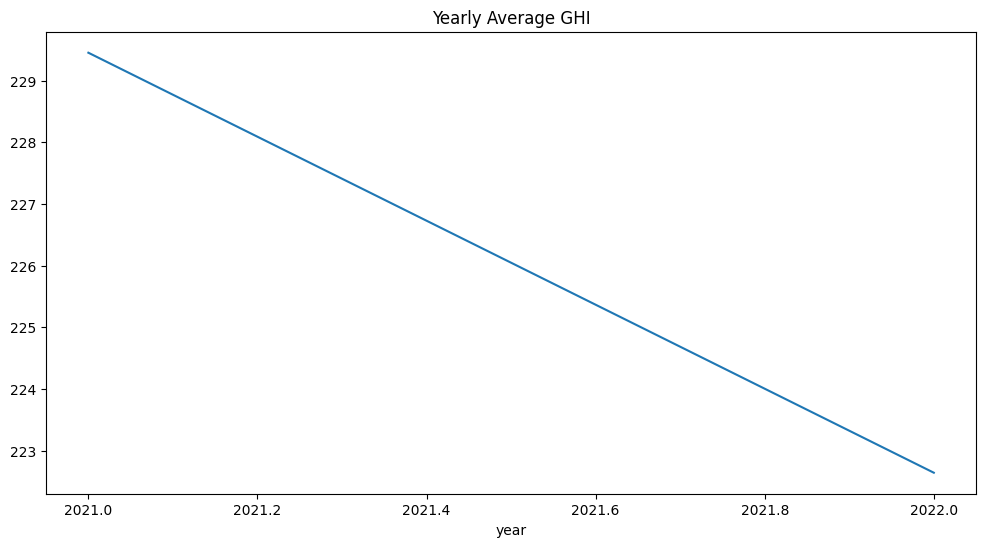

In [140]:
# Calculate yearly averages for GHI, DNI, etc.
yearly_avg = combined_data.groupby('year')[['GHI', 'DNI', 'DHI']].mean()

# Plot the average GHI by year
yearly_avg['GHI'].plot(title="Yearly Average GHI", figsize=(12, 6))


#### Step 7: Autocorrelation (ACF and PACF)

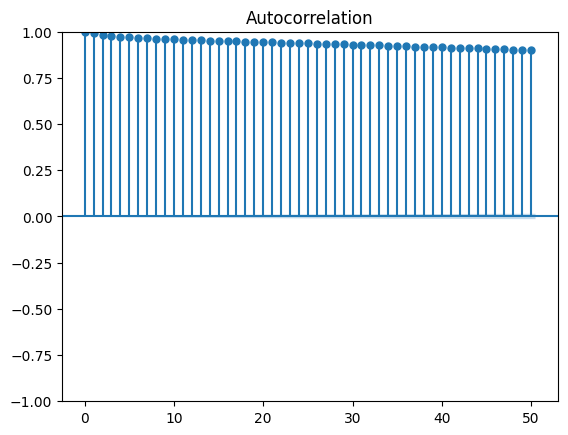

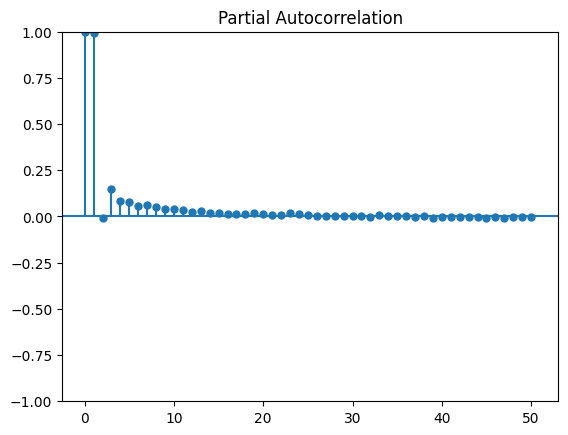

In [142]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for GHI to check for temporal dependencies
plot_acf(combined_data['GHI'].dropna(), lags=50)
plot_pacf(combined_data['GHI'].dropna(), lags=50)
plt.show()
